Loading historical data from cache...
Loading historical data from cache...
Loading historical data from cache...
mu_mean: 0.7371, mu_std: 0.3673
sigma_mean: 0.3673, sigma_std: 0.0688


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [mu, sigma]


Sampling 4 chains for 500 tune and 1_000 draw iterations (2_000 + 4_000 draws total) took 1 seconds.


Start Price: 63.69


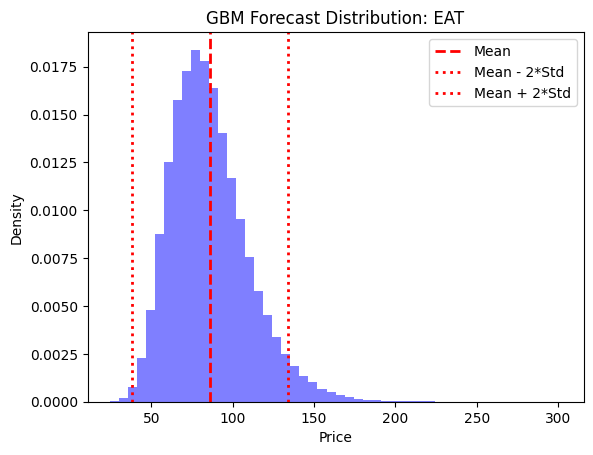

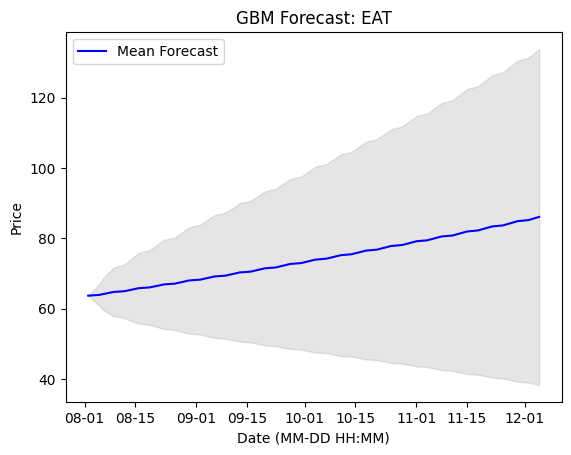


95% Confidence Interval:
Lower Bound: 38.30
Upper Bound: 133.89

Coverage Probability: 0.96
Number of Simulations Above Upper Bound: 3964
Number of Simulations Below Lower Bound: 239


<Figure size 640x480 with 0 Axes>

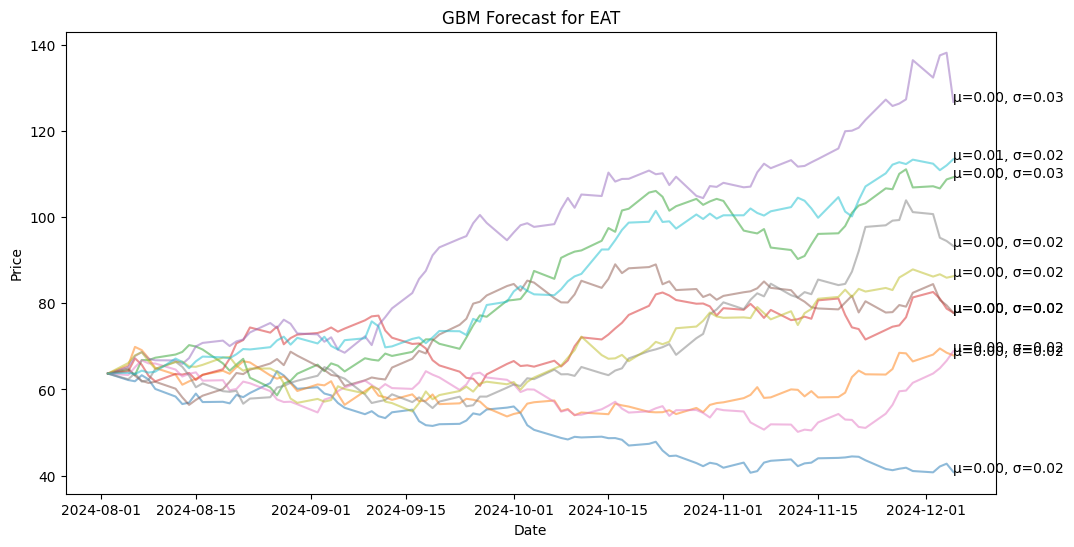

Simulation 1 MSE: 2401.4666082852004
Simulation 2 MSE: 1415.0954378929507
Simulation 3 MSE: 165.7451845982513
Simulation 4 MSE: 682.6653583942779
Simulation 5 MSE: 110.34851540811708
Simulation 6 MSE: 551.0496878527367
Simulation 7 MSE: 1639.0449572970836
Simulation 8 MSE: 530.0070041816223
Simulation 9 MSE: 662.364630948099
Simulation 10 MSE: 91.8542597847846
Simulation 11 MSE: 240.65498046625112
Simulation 12 MSE: 888.7196926183283
Simulation 13 MSE: 847.9326093939408
Simulation 14 MSE: 649.44651719329
Simulation 15 MSE: 250.07709655589247
Simulation 16 MSE: 1056.7094807844478
Simulation 17 MSE: 476.2171713727996
Simulation 18 MSE: 597.8355791298526
Simulation 19 MSE: 378.70530193132527
Simulation 20 MSE: 1031.0592541536516
Simulation 21 MSE: 1105.5153024285987
Simulation 22 MSE: 121.60580403913168
Simulation 23 MSE: 999.925187673506
Simulation 24 MSE: 1571.0646864871362
Simulation 25 MSE: 309.8199734321966
Simulation 26 MSE: 305.38944938563327
Simulation 27 MSE: 583.7768108708709
Si

In [ ]:




from backtester import Backtester
import matplotlib.pyplot as plt
# ignore warnings
import warnings
import pandas as pd
warnings.filterwarnings('ignore')

stock = 'SG'
time_periods = 90
gbm_params = {
    'threshold': 2,
    'time_periods': time_periods,
    'num_simulations': 100000,
}
backtester = Backtester(stock, 'SMART', 'USD')
# data will be the most recent year of data, excluding the last 90 days. this is 
# because we will use the last 90 days as the test data
df = backtester.one_yr_1d_data
# is df a pandas dataframe?


# train data is the data excluding the last 90 days
train_data = df[df.index < df.index[-time_periods]]
test_data = df['close'][df.index >= df.index[-time_periods]]



simulations, associated_mu, associated_sigma, forecast_dates = backtester.forecast_data(gbm_params,train_data)
# we will use the last 90 days of data to test the model

mses = []
for i in range(gbm_params['num_simulations']):
    simulation = simulations[i]
    mse = sum((test_data - simulation) ** 2) / len(test_data)
    mses.append(mse)
    print(f'Simulation {i+1} MSE: {mse}')








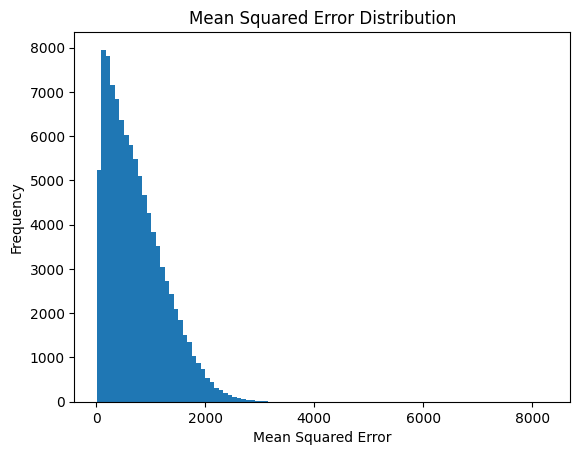

Simulation 1 MSE: 10.115480070112081
Associated mu: 0.0015107718904430782
Associated sigma: 0.02342306370655005
Simulation 2 MSE: 11.577604463872914
Associated mu: 0.005599565814654696
Associated sigma: 0.022801526371573858
Simulation 3 MSE: 12.378029896873073
Associated mu: 0.004797572460866116
Associated sigma: 0.02230758753199106
Simulation 4 MSE: 12.86549780539124
Associated mu: 0.004100802821428659
Associated sigma: 0.022352572325284568
Simulation 5 MSE: 13.221377251441575
Associated mu: 0.0053890629477289205
Associated sigma: 0.021680782892069393
Simulation 6 MSE: 13.939947266701575
Associated mu: 0.0032995785505273894
Associated sigma: 0.023652609213088246
Simulation 7 MSE: 13.948257058144858
Associated mu: 0.005273393984448333
Associated sigma: 0.023713180135615106
Simulation 8 MSE: 14.387303968336619
Associated mu: 0.005816879473760619
Associated sigma: 0.022911264789251547
Simulation 9 MSE: 14.487388156184346
Associated mu: 0.0065634709870429735
Associated sigma: 0.0210609798

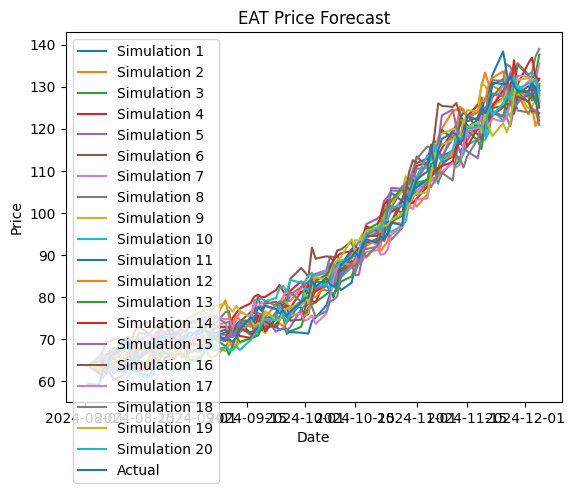

In [4]:
# study the distribution of the mean squared errors
# disgard inf
plt.hist(mses, bins=100)
plt.xlabel('Mean Squared Error')
plt.ylabel('Frequency')
plt.title('Mean Squared Error Distribution')
plt.show()

# i want to do analysis on say how confident the model is in its predictions
# show some of the simulations that have the lowest mean squared error

# mses is a list of mean squared errors for each simulation
# plot the simulations with the 5 lowest mean squared error
for i in range(20):
    plt.plot(forecast_dates, simulations[mses.index(min(mses))], label=f'Simulation {i+1}')
    print(f'Simulation {i+1} MSE: {min(mses)}')
    # print the associated mu and sigma
    print(f'Associated mu: {associated_mu[mses.index(min(mses))]}')
    print(f'Associated sigma: {associated_sigma[mses.index(min(mses))]}') 
    mses[mses.index(min(mses))] = float('inf')

plt.plot(forecast_dates, test_data, label='Actual')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Price')
plt.title(f'{stock} Price Forecast')
plt.show()